# Assignment 1. Music Century Classification

**Assignment Responsible**: Natalie Lang.

In this assignment, we will build models to predict which
**century** a piece of music was released.  We will be using the "YearPredictionMSD Data Set"
based on the Million Song Dataset. The data is available to download from the UCI 
Machine Learning Repository. Here are some links about the data:

- https://archive.ics.uci.edu/ml/datasets/yearpredictionmsd
- http://millionsongdataset.com/pages/tasks-demos/#yearrecognition

Note that you are note allowed to import additional packages **(especially not PyTorch)**. One of the objectives is to understand how the training procedure actually operates, before working with PyTorch's autograd engine which does it all for us.


## Question 1. Data (21%)

Start by setting up a Google Colab notebook in which to do your work.
Since you are working with a partner, you might find this link helpful:

- https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb

The recommended way to work together is pair coding, where you and your partner are sitting together and writing code together. 

To process and read the data, we use the popular `pandas` package for data analysis.

Noam Atias - ID:311394357

Chanel Michaeli - ID:208491787 

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

Now that your notebook is set up, we can load the data into the notebook. The code below provides
two ways of loading the data: directly from the internet, or through mounting Google Drive.
The first method is easier but slower, and the second method is a bit involved at first, but
can save you time later on. You will need to mount Google Drive for later assignments, so we recommend
figuring how to do that now.

Here are some resources to help you get started:

- http.://colab.research.google.com/notebooks/io.ipynb

In [2]:
load_from_drive = True

if not load_from_drive:
  csv_path = "http://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip"
else:
  from google.colab import drive
  drive.mount('/content/gdrive')
  csv_path = '/content/gdrive/My Drive/Colab Notebooks/YearPredictionMSD.txt' # TODO - UPDATE ME WITH THE TRUE PATH!

t_label = ["year"]
x_labels = ["var%d" % i for i in range(1, 91)]
df = pandas.read_csv(csv_path, names=t_label + x_labels)

Mounted at /content/gdrive


Now that the data is loaded to your Colab notebook, you should be able to display the Pandas
DataFrame `df` as a table:

In [3]:
df

,year,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30,var31,var32,var33,var34,var35,var36,var37,var38,var39,...,var51,var52,var53,var54,var55,var56,var57,var58,var59,var60,var61,var62,var63,var64,var65,var66,var67,var68,var69,var70,var71,var72,var73,var74,var75,var76,var77,var78,var79,var80,var81,var82,var83,var84,var85,var86,var87,var88,var89,var90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,-2.46783,3.32136,-2.31521,10.20556,611.10913,951.08960,698.11428,408.98485,383.70912,326.51512,238.11327,251.42414,187.17351,100.42652,179.19498,-8.41558,-317.87038,95.86266,48.10259,-95.66303,-18.06215,1.96984,34.42438,11.72670,1.36790,7.79444,-0.36994,-133.67852,-83.26165,-37.29765,...,-25.38187,-3.90772,13.29258,41.55060,-7.26272,-21.00863,105.50848,64.29856,26.08481,-44.59110,-8.30657,7.93706,-10.73660,-95.44766,-82.03307,-35.59194,4.69525,70.95626,28.09139,6.02015,-37.13767,-41.12450,-8.40816,7.19877,-8.60176,-5.90857,-12.32437,14.68734,-54.32125,40.14786,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,4.59210,2.21920,0.34006,44.38997,2056.93836,605.40696,457.41175,777.15347,415.64880,746.47775,366.45320,317.82946,273.07917,141.75921,317.35269,19.48271,-65.25496,162.75145,135.00765,-96.28436,-86.87955,17.38087,45.90742,32.49908,-32.85429,45.10830,26.84939,-302.57328,-41.71932,-138.85034,...,28.55107,1.52298,70.99515,-43.63073,-42.55014,129.82848,79.95420,-87.14554,-45.75446,-65.82100,-43.90031,-19.45705,12.59163,-407.64130,42.91189,12.15850,-88.37882,42.25246,46.49209,-30.17747,45.98495,130.47892,13.88281,-4.00055,17.85965,-18.32138,-87.99109,14.37524,-22.70119,-58.81266,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,1.39518,2.73553,0.82804,7.46586,699.54544,1016.00954,594.06748,355.73663,507.39931,387.69910,287.15347,112.37152,161.68928,144.14353,199.29693,-4.24359,-297.00587,-148.36392,-7.94726,-18.71630,12.77542,-25.37725,9.71410,0.13843,26.79723,6.30760,28.70107,-74.89005,-289.19553,-166.26089,...,18.50939,16.97216,24.26629,-10.50788,-8.68412,54.75759,194.74034,7.95966,-18.22685,0.06463,-2.63069,26.02561,1.75729,-262.36917,-233.60089,-2.50502,-12.14279,81.37617,2.07554,-1.82381,183.65292,22.64797,-39.98887,43.37381,-31.56737,-4.88840,-36.53213,-23.94662,-84.19275,66.00518,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,-6.36304,6.63016,-3.35142,37.64085,2174.08189,697.43346,459.24587,742.78961,229.30783,387.89697,249.06662,245.89870,176.20527,98.82222,150.97286,78.49057,-62.00282,43.49659,-96.42719,-108.96608,14.22854,14.54178,-23.55608,-39.36953,-43.59209,20.83714,35.63919,-181.34947,-93.66614,-90.55616,...,4.56917,-37.32280,4.15159,12.24315,35.02697,-178.89573,82.46573,-20.49425,101.78577,-19.77808,-21.52657,3.36303,-11.63176,51.55411,-50.57576,-28.14755,-83.15795,-7.35260,-22.11505,1.18279,-122.70467,150.57360,24.37468,41.19821,-37.04318,-28.72986,162.19614,22.18309,-8.63509,85.23416,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,0.93609,1.60923,2.19223,47.32082,894.28471,809.86615,318.78559,435.04497,341.61467,334.30734,322.99589,190.61921,235.84715,96.89517,210.58870,5.60463,-199.63958,204.85812,-77.17695,-65.79741,-6.95097,-12.15262,-3.85410,20.68990,-20.30480,37.15045,11.20673,-124.09519,-295.98542,-33.31169,...,45.25506,10.42226,27.88782,-17.12676,-31.54772,-76.86293,41.17343,-138.32535,-53.96905,-21.30266,-24.87362,-2.46595,-4.0500

To set up our data for classification, we'll use the "year" field to represent
whether a song was released in the 20-th century. In our case `df["year"]` will be 1 if
the year was released after 2000, and 0 otherwise.

In [4]:
df["year"] = df["year"].map(lambda x: int(x > 2000))

In [5]:
df.head(20)

,year,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30,var31,var32,var33,var34,var35,var36,var37,var38,var39,...,var51,var52,var53,var54,var55,var56,var57,var58,var59,var60,var61,var62,var63,var64,var65,var66,var67,var68,var69,var70,var71,var72,var73,var74,var75,var76,var77,var78,var79,var80,var81,var82,var83,var84,var85,var86,var87,var88,var89,var90
0,1,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,-2.46783,3.32136,-2.31521,10.20556,611.10913,951.08960,698.11428,408.98485,383.70912,326.51512,238.11327,251.42414,187.17351,100.42652,179.19498,-8.41558,-317.87038,95.86266,48.10259,-95.66303,-18.06215,1.96984,34.42438,11.72670,1.36790,7.79444,-0.36994,-133.67852,-83.26165,-37.29765,...,-25.38187,-3.90772,13.29258,41.55060,-7.26272,-21.00863,105.50848,64.29856,26.08481,-44.59110,-8.30657,7.93706,-10.73660,-95.44766,-82.03307,-35.59194,4.69525,70.95626,28.09139,6.02015,-37.13767,-41.12450,-8.40816,7.19877,-8.60176,-5.90857,-12.32437,14.68734,-54.32125,40.14786,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,1,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,4.59210,2.21920,0.34006,44.38997,2056.93836,605.40696,457.41175,777.15347,415.64880,746.47775,366.45320,317.82946,273.07917,141.75921,317.35269,19.48271,-65.25496,162.75145,135.00765,-96.28436,-86.87955,17.38087,45.90742,32.49908,-32.85429,45.10830,26.84939,-302.57328,-41.71932,-138.85034,...,28.55107,1.52298,70.99515,-43.63073,-42.55014,129.82848,79.95420,-87.14554,-45.75446,-65.82100,-43.90031,-19.45705,12.59163,-407.64130,42.91189,12.15850,-88.37882,42.25246,46.49209,-30.17747,45.98495,130.47892,13.88281,-4.00055,17.85965,-18.32138,-87.99109,14.37524,-22.70119,-58.81266,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,1,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,1.39518,2.73553,0.82804,7.46586,699.54544,1016.00954,594.06748,355.73663,507.39931,387.69910,287.15347,112.37152,161.68928,144.14353,199.29693,-4.24359,-297.00587,-148.36392,-7.94726,-18.71630,12.77542,-25.37725,9.71410,0.13843,26.79723,6.30760,28.70107,-74.89005,-289.19553,-166.26089,...,18.50939,16.97216,24.26629,-10.50788,-8.68412,54.75759,194.74034,7.95966,-18.22685,0.06463,-2.63069,26.02561,1.75729,-262.36917,-233.60089,-2.50502,-12.14279,81.37617,2.07554,-1.82381,183.65292,22.64797,-39.98887,43.37381,-31.56737,-4.88840,-36.53213,-23.94662,-84.19275,66.00518,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,1,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,-6.36304,6.63016,-3.35142,37.64085,2174.08189,697.43346,459.24587,742.78961,229.30783,387.89697,249.06662,245.89870,176.20527,98.82222,150.97286,78.49057,-62.00282,43.49659,-96.42719,-108.96608,14.22854,14.54178,-23.55608,-39.36953,-43.59209,20.83714,35.63919,-181.34947,-93.66614,-90.55616,...,4.56917,-37.32280,4.15159,12.24315,35.02697,-178.89573,82.46573,-20.49425,101.78577,-19.77808,-21.52657,3.36303,-11.63176,51.55411,-50.57576,-28.14755,-83.15795,-7.35260,-22.11505,1.18279,-122.70467,150.57360,24.37468,41.19821,-37.04318,-28.72986,162.19614,22.18309,-8.63509,85.23416,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,1,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,0.93609,1.60923,2.19223,47.32082,894.28471,809.86615,318.78559,435.04497,341.61467,334.30734,322.99589,190.61921,235.84715,96.89517,210.58870,5.60463,-199.63958,204.85812,-77.17695,-65.79741,-6.95097,-12.15262,-3.85410,20.68990,-20.30480,37.15045,11.20673,-124.09519,-295.98542,-33.31169,...,45.25506,10.42226,27.88782,-17.12676,-31.54772,-76.86293,41.17343,-138.32535,-53.96905,-21.30266,-24.87362,-2.46595,-4.05003,-56.51161,-34

### Part (a) -- 7%

The data set description text asks us to respect the below train/test split to
avoid the "producer effect". That is, we want to make sure that no song from a single artist
ends up in both the training and test set.

Explain why it would be problematic to have
some songs from an artist in the training set, and other songs from the same artist in the
test set. (Hint: Remember that we want our test accuracy to predict how well the model
will perform in practice on a song it hasn't learned about.)

In [6]:
df_train = df[:463715]
df_test = df[463715:]

# convert to numpy
train_xs = df_train[x_labels].to_numpy()
train_ts = df_train[t_label].to_numpy()
test_xs = df_test[x_labels].to_numpy()
test_ts = df_test[t_label].to_numpy()

# The problem with having some songs from an artist in the training set, and other songs from the same artist in the test set is that usually artists have the same musical style so their songs have the same musical featurs and salient production details.
# Therefore, this might cuase high test accuarcy due to test data that contains songs that are well known for the model.  
# That effect is problematic because we would like to get high acccuarcy due to well trained model that can predict songs that it has no knowlage about.

### Part (b) -- 7%

It can be beneficial to **normalize** the columns, so that each column (feature)
has the *same* mean and standard deviation.

In [7]:
feature_means = df_train.mean()[1:].to_numpy() # the [1:] removes the mean of the "year" field
feature_stds  = df_train.std()[1:].to_numpy()

train_norm_xs = (train_xs - feature_means) / feature_stds
test_norm_xs = (test_xs - feature_means) / feature_stds

Notice how in our code, we normalized the test set using the *training data means and standard deviations*.
This is *not* a bug.

Explain why it would be improper to compute and use test set means
and standard deviations. (Hint: Remember what we want to use the test accuracy to measure.)

In [8]:
# We must use the same normalization for the test set and the training set. When we center and scale a variable in a training data, we are essentially creating a brand new variable. 
# To use this new variable to predict for test set, we have to create the same variable in this data set. 
# Different normalizaion in the training set and the test set does not creat the same variable. 
# If we will normalize the test set with the mean and standart deviation of the test set, it's possible that some test data points will end up having same values as some different train data points of the normalized train set (by its own mean and stndart deviation).


### Part (c) -- 7%

Finally, we'll move some of the data in our training set into a validation set.

Explain why we should limit how many times we use the test set, and that we should use the validation
set during the model building process.

In [9]:
# shuffle the training set
reindex = np.random.permutation(len(train_xs))
train_xs = train_xs[reindex]
train_norm_xs = train_norm_xs[reindex]
train_ts = train_ts[reindex]

# use the first 50000 elements of `train_xs` as the validation set
train_xs, val_xs           = train_xs[50000:], train_xs[:50000]
train_norm_xs, val_norm_xs = train_norm_xs[50000:], train_norm_xs[:50000]
train_ts, val_ts           = train_ts[50000:], train_ts[:50000]

# We want the test set to evaluate how good our model is, after the model trained on the training set, 
# so we should limit the times that we use the test set in order to prevant from the model to use it for training.

# To overcome overfitting, it is very important to save data which is not used during training to evaluate our process. 
# We use the validation data to get eproximation of the generilazation error because the model did not use this data for training purposes. 
# Validation data purpose is to make sure that the model is not memorizing the specific of the data set, 
# Therefor we use it during the model building process to make adjustments.

## Part 2. Classification (79%)

We will first build a *classification* model to perform decade classification.
These helper functions are written for you. All other code that you write in this section should be vectorized whenever possible (i.e., avoid unnecessary loops).

In [10]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))
    
def cross_entropy(t, y):
  return -t * np.log(y) - (1 - t) * np.log(1 - y)

def cost(y, t):
  return np.mean(cross_entropy(t, y))

def get_accuracy(y, t):
  acc = 0
  N = 0
  for i in range(len(y)):
    N += 1
    if (y[i] >= 0.5 and t[i] == 1) or (y[i] < 0.5 and t[i] == 0):
      acc += 1
  return acc / N

### Part (a) -- 7%

Write a function `pred` that computes the prediction `y` based on logistic regression, i.e., a single layer with weights `w` and bias `b`. The output is given by: 
\begin{equation}
y = \sigma({\bf w}^T {\bf x} + b),
\end{equation}
where the value of $y$ is an estimate of the probability that the song is released in the current century, namely ${\rm year} =1$.

In [11]:
def pred(w, b, X):
  """
  Returns the prediction `y` of the target based on the weights `w` and scalar bias `b`.

  Preconditions: np.shape(w) == (90,)
                 type(b) == float
                 np.shape(X) = (N, 90) for some N

  >>> pred(np.zeros(90), 1, np.ones([2, 90]))
  array([0.73105858, 0.73105858]) # It's okay if your output differs in the last decimals
  """
  #w_t = np.transpose(w)
  #X_t = np.transpose(X)
  delta = pow(10,-10)
  y = sigmoid(np.matmul(X,w)+b)
  for i in range(len(y)):
    if y[i] < delta:
      y[i] = delta
    elif y[i] > 1-delta:
      y[i] = 1-delta
  return(y)
pred(np.zeros(90), 1, np.ones([2,90]))

array([0.73105858, 0.73105858])

### Part (b) -- 7%

Write a function `derivative_cost` that computes and returns the gradients 
$\frac{\partial\mathcal{L}}{\partial {\bf w}}$ and
$\frac{\partial\mathcal{L}}{\partial b}$. Here, `X` is the input, `y` is the prediction, and `t` is the true label.




In [12]:
def derivative_cost(X, y, t):
  """
  Returns a tuple containing the gradients dLdw and dLdb.

  Precondition: np.shape(X) == (N, 90) for some N
                np.shape(y) == (N,)
                np.shape(t) == (N,)

  Postcondition: np.shape(dLdw) = (90,)
           type(dLdb) = float
  """
  dLdw = np.matmul(np.subtract(y,t),X)/np.size(y)
  dLdb = np.mean(y-t)
  return(dLdw,dLdb)


# **Explenation on Gradients**




**Add here an explaination on how the gradients are computed**:

Write your explanation here. Use Latex to write mathematical expressions. [Here is a brief tutorial on latex for notebooks.](https://www.math.ubc.ca/~pwalls/math-python/jupyter/latex/)



$$L = -t\cdot log(y)-(1-t)\cdot log(1-y)=[y=\frac{1}{1+e^{-z}}]
=-t\cdot log(\frac{1}{1+e^{-z}})-(1-t)\cdot log(1-\frac{1}{1+e^{-z}})=t\cdot log(1+e^{-z})-(1-t)\cdot [log(e^{-z})-log(1+e^{-z})]
=t\cdot log(1+e^{-z})-(1-t)\cdot log(e^{-z})+(1-t)\cdot log(1+e^{-z})=log(1+e^{-z})-(1-t)\cdot log(e^{-z})=log(1+e^{-z})+z\cdot (1-t)$$

$$ cost = \frac{1}{N}\sum_{i=0}^{\infty}(z\cdot i\cdot (1-t)+log(1+e^{-z\cdot i})) =\frac{1}{N}\sum_{i=0}^{\infty}z\cdot i\cdot (1-t_i)+log(1+e^{-z\cdot i})$$

$$ \frac{dL}{dw_i}=\frac{1}{N}\sum_{i=0}^{\infty}((1-t_i)\cdot \frac{dz_i}{dw_i}-\frac{e^{-z_i}}{1+e^{-z_i}}\cdot \frac{dz_i}{dw_i}=[(\frac{dz_i}{dw_i}=x_{ij}), (\frac{dz_i}{db}=1)]=\frac{dL}{dw_i}=\frac{1}{N}\sum_{i=0}^{\infty}((1-t_i)\cdot x_{ij}-\frac{e^{-z_i}}{1+e^{-z_i}}\cdot x_{ij})=\frac{1}{N}\sum_{i=0}^{\infty}((1-t_i)-\frac{e^{-z_i}}{1+e^{-z_i}}\cdot)\cdot x_{ij}=\frac{1}{N}\sum_{i=0}^{\infty}(\frac{1}{1+e^{-z_i}}-t_i)\cdot x_{ij}=\frac{1}{N}\sum_{i=0}^{\infty}(y_i-t_i)\cdot x_{ij}=\frac{1}{N}\cdot (y-t)\cdot x_j$$

$$ \frac{dL}{db}=\frac{1}{N}\sum_{i=0}^{\infty}((1-t_i)\cdot \frac{dz_i}{db}-\frac{e^{-z_i}}{1+e^{-z_i}}\cdot \frac{dz_i}{db}=\frac{1}{N}\sum_{i=0}^{\infty}(y_i-t_i)=\frac{1}{N}\cdot (y-t)$$

### Part (c) -- 7%

We can check that our derivative is implemented correctly using the finite difference rule. In 1D, the
finite difference rule tells us that for small $h$, we should have

$$\frac{f(x+h) - f(x)}{h} \approx f'(x)$$

Show that $\frac{\partial\mathcal{L}}{\partial b}$  is implement correctly
by comparing the result from `derivative_cost` with the empirical cost derivative computed using the above numerical approximation.


In [13]:

'''
r1 = ...
r2 = ...
print("The analytical results is -", r1)
print("The algorithm results is - ", r2)
'''

h = 0.00000001
w = np.zeros(90)
b = 1
X = np.ones([2,90])
t = np.ones(2)   
y_b = pred(w,b,X)
L_b = cost(y_b,t)
y_h = pred(w,b+h,X)
L_h = cost(y_h,t)
dLdb_analitic = (L_h - L_b)/h
dLdb_algorithm = derivative_cost(X, y_b, t)[-1]
print("The analytical results is -", dLdb_analitic)
print("The algorithm results is - ", dLdb_algorithm)



The analytical results is - -0.26894141358368984
The algorithm results is -  -0.2689414213699951


### Part (d) -- 7%

Show that $\frac{\partial\mathcal{L}}{\partial {\bf w}}$  is implement correctly.

In [14]:
# Your code goes here. You might find this below code helpful: but it's
# up to you to figure out how/why, and how to modify the code

'''
r1 = ...
r2 = ...
print("The analytical results is -", r1)
print("The algorithm results is - ", r2)
'''
h = 0.00000001
w = np.zeros(90)
b = 1
X = np.ones([2,90])
t = np.ones(2) 
y_w = pred(w,b,X)
L_w = cost(y_w,t)
L_w = []
L_h = []
for i in range(np.size(w)):
  w = np.zeros(90)
  y_w = pred(w,b,X)
  L_w1 = cost(y_w,t)
  L_w = np.append(L_w, [L_w1])
  np.put(w, [i], [w[i]+h])
  y_h = pred(w,b,X)
  L_h1 = cost(y_h,t)
  L_h = np.append(L_h,[L_h1])
dLdw_analitic = (L_h - L_w)/h
dLdw_algorithm = derivative_cost(X, y_b, t)[0]

print("The analytical results is -", dLdw_analitic)
print("The algorithm results is - ", dLdw_algorithm)


The analytical results is - [-0.26894141 -0.26894141 -0.26894141 -0.26894141 -0.26894141 -0.26894141
 -0.26894141 -0.26894141 -0.26894141 -0.26894141 -0.26894141 -0.26894141
 -0.26894141 -0.26894141 -0.26894141 -0.26894141 -0.26894141 -0.26894141
 -0.26894141 -0.26894141 -0.26894141 -0.26894141 -0.26894141 -0.26894141
 -0.26894141 -0.26894141 -0.26894141 -0.26894141 -0.26894141 -0.26894141
 -0.26894141 -0.26894141 -0.26894141 -0.26894141 -0.26894141 -0.26894141
 -0.26894141 -0.26894141 -0.26894141 -0.26894141 -0.26894141 -0.26894141
 -0.26894141 -0.26894141 -0.26894141 -0.26894141 -0.26894141 -0.26894141
 -0.26894141 -0.26894141 -0.26894141 -0.26894141 -0.26894141 -0.26894141
 -0.26894141 -0.26894141 -0.26894141 -0.26894141 -0.26894141 -0.26894141
 -0.26894141 -0.26894141 -0.26894141 -0.26894141 -0.26894141 -0.26894141
 -0.26894141 -0.26894141 -0.26894141 -0.26894141 -0.26894141 -0.26894141
 -0.26894141 -0.26894141 -0.26894141 -0.26894141 -0.26894141 -0.26894141
 -0.26894141 -0.2689414

### Part (e) -- 7%

Now that you have a gradient function that works, we can actually run gradient descent. 
Complete the following code that will run stochastic: gradient descent training:

In [15]:
def run_gradient_descent(w0, b0, train_norm_xs, train_ts, mu=0.1, batch_size=100, max_iters=100):
  """Return the values of (w, b) after running gradient descent for max_iters.
  We use:
    - train_norm_xs and train_ts as the training set
    - val_norm_xs and val_ts as the test set
    - mu as the learning rate
    - (w0, b0) as the initial values of (w, b)

  Precondition: np.shape(w0) == (90,)
                type(b0) == float
 
  Postcondition: np.shape(w) == (90,)
                 type(b) == float
  """
  w = w0
  b = b0
  iter = 0

  while iter < max_iters:
    # shuffle the training set (there is code above for how to do this)
    reindex = np.random.permutation(len(train_norm_xs))
    train_norm_xs = train_norm_xs[reindex]
    train_ts = train_ts[reindex]
    list_val_cost = []
    iter_list = []
    for i in range(0, len(train_norm_xs), batch_size): # iterate over each minibatch
      # minibatch that we are working with:
      X = train_norm_xs[i:(i + batch_size)]
      t = train_ts[i:(i + batch_size), 0]

      # since len(train_norm_xs) does not divide batch_size evenly, we will skip over
      # the "last" minibatch
      if np.shape(X)[0] != batch_size:
        continue

      # compute the prediction    
      y = pred(w,b,X)
      # update w and b
      dLdw = derivative_cost(X, y, t)[0]
      dLdb = derivative_cost(X, y, t)[-1]
      w = w-np.dot(mu,dLdw)
      b = b-np.dot(mu,dLdb)
      # increment the iteration count
      iter += 1
      y_val = []
      # compute and print the *validation* loss and accuracy
      if (iter % 10 == 0):
        iter_list= np.append(iter_list,[iter])
        y_val = pred(w,b,val_norm_xs)
        val_cost = cost(y_val, np.transpose(val_ts))
        val_acc = get_accuracy(y_val, val_ts)
        print("Iter %d. [Val Acc %.0f%%, Loss %f]" % (
                iter, val_acc * 100, val_cost))
        list_val_cost= np.append(list_val_cost,[val_cost])
      if iter >= max_iters:
        break

      # Think what parameters you should return for further use
      
  return [(w,b),list_val_cost,iter_list]



### Part (f) -- 7%

Call `run_gradient_descent` with the weights and biases all initialized to zero.
Show that if the learning rate $\mu$ is too small, then convergence is slow.
Also, show that if $\mu$ is too large, then the optimization algorirthm does not converge. The demonstration should be made using plots showing these effects.

learning rate is  1e-20
Iter 10. [Val Acc 48%, Loss 3.454326]
Iter 20. [Val Acc 48%, Loss 3.454326]
Iter 30. [Val Acc 48%, Loss 3.454326]
Iter 40. [Val Acc 48%, Loss 3.454326]
Iter 50. [Val Acc 48%, Loss 3.454326]
Iter 60. [Val Acc 48%, Loss 3.454326]
Iter 70. [Val Acc 48%, Loss 3.454326]
Iter 80. [Val Acc 48%, Loss 3.454326]
Iter 90. [Val Acc 48%, Loss 3.454326]
Iter 100. [Val Acc 48%, Loss 3.454326]


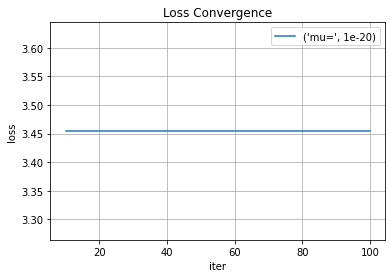

learning rate is  1e-10
Iter 10. [Val Acc 48%, Loss 3.454326]
Iter 20. [Val Acc 48%, Loss 3.454326]
Iter 30. [Val Acc 48%, Loss 3.454326]
Iter 40. [Val Acc 48%, Loss 3.454326]
Iter 50. [Val Acc 48%, Loss 3.454326]
Iter 60. [Val Acc 48%, Loss 3.454326]
Iter 70. [Val Acc 48%, Loss 3.454326]
Iter 80. [Val Acc 48%, Loss 3.454326]
Iter 90. [Val Acc 48%, Loss 3.454326]
Iter 100. [Val Acc 48%, Loss 3.454326]


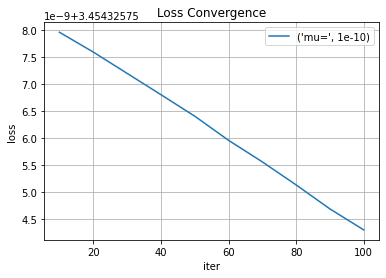

learning rate is  0.001
Iter 10. [Val Acc 48%, Loss 3.450551]
Iter 20. [Val Acc 48%, Loss 3.446563]
Iter 30. [Val Acc 48%, Loss 3.442204]
Iter 40. [Val Acc 48%, Loss 3.438256]
Iter 50. [Val Acc 48%, Loss 3.434618]
Iter 60. [Val Acc 48%, Loss 3.430655]
Iter 70. [Val Acc 48%, Loss 3.427000]
Iter 80. [Val Acc 48%, Loss 3.423074]
Iter 90. [Val Acc 48%, Loss 3.419262]
Iter 100. [Val Acc 48%, Loss 3.415351]


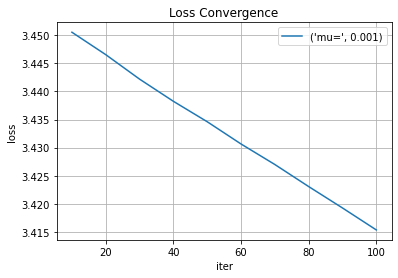

learning rate is  0.01
Iter 10. [Val Acc 48%, Loss 3.413015]
Iter 20. [Val Acc 48%, Loss 3.376845]
Iter 30. [Val Acc 48%, Loss 3.340036]
Iter 40. [Val Acc 48%, Loss 3.309416]
Iter 50. [Val Acc 48%, Loss 3.275617]
Iter 60. [Val Acc 48%, Loss 3.238300]
Iter 70. [Val Acc 48%, Loss 3.201852]
Iter 80. [Val Acc 48%, Loss 3.162433]
Iter 90. [Val Acc 48%, Loss 3.129728]
Iter 100. [Val Acc 49%, Loss 3.097447]


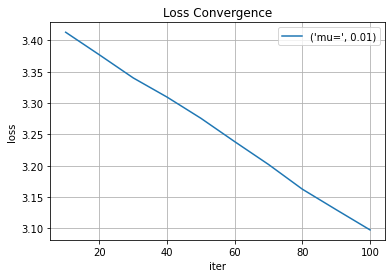

learning rate is  0.1
Iter 10. [Val Acc 48%, Loss 3.107439]
Iter 20. [Val Acc 50%, Loss 2.808435]
Iter 30. [Val Acc 51%, Loss 2.528318]
Iter 40. [Val Acc 52%, Loss 2.295690]
Iter 50. [Val Acc 53%, Loss 2.109201]
Iter 60. [Val Acc 54%, Loss 1.967676]
Iter 70. [Val Acc 55%, Loss 1.856828]
Iter 80. [Val Acc 56%, Loss 1.755174]
Iter 90. [Val Acc 56%, Loss 1.661477]
Iter 100. [Val Acc 57%, Loss 1.590803]


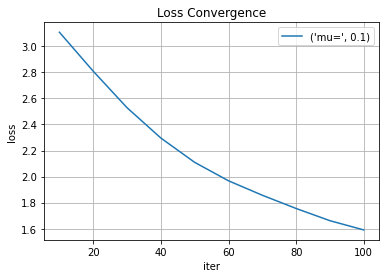

learning rate is  1
Iter 10. [Val Acc 56%, Loss 1.679474]
Iter 20. [Val Acc 61%, Loss 1.138454]
Iter 30. [Val Acc 66%, Loss 0.922315]
Iter 40. [Val Acc 66%, Loss 0.790232]
Iter 50. [Val Acc 69%, Loss 0.707315]
Iter 60. [Val Acc 68%, Loss 0.744407]
Iter 70. [Val Acc 70%, Loss 0.653909]
Iter 80. [Val Acc 67%, Loss 0.734724]
Iter 90. [Val Acc 70%, Loss 0.638301]
Iter 100. [Val Acc 69%, Loss 0.670391]


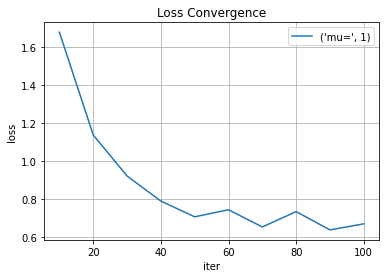

learning rate is  1000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Iter 10. [Val Acc 60%, Loss 9.131141]
Iter 20. [Val Acc 63%, Loss 8.451795]
Iter 30. [Val Acc 63%, Loss 8.406244]
Iter 40. [Val Acc 63%, Loss 8.470843]
Iter 50. [Val Acc 61%, Loss 8.901181]
Iter 60. [Val Acc 59%, Loss 9.319325]
Iter 70. [Val Acc 56%, Loss 10.014222]
Iter 80. [Val Acc 67%, Loss 7.514612]
Iter 90. [Val Acc 64%, Loss 8.258463]
Iter 100. [Val Acc 67%, Loss 7.629521]


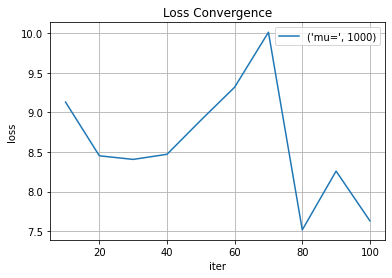

In [16]:
w0 = np.random.randn(90)
b0 = np.random.randn(1)[0]
mu_list = [pow(10,-20),pow(10,-10),pow(10,-3),pow(10,-2),pow(10,-1),pow(10,0),pow(10,3)]
for i in range(len(mu_list)):
  m = mu_list[i]
  print("learning rate is ",m)
  run = run_gradient_descent(w0, b0, train_norm_xs, train_ts, mu=m, batch_size=100, max_iters=100)
  plt.plot(run[-1],run[1])
  plt.xlabel('iter')
  plt.ylabel('loss')
  plt.title('Loss Convergence')
  plt.legend([('mu=',m)], loc ="best")
  plt.grid(True)
  plt.show()

**Explain and discuss your results here:**
At the first graph, using learning rate equal to 10^-20, we can see that each iteration the loss barely changes. At the second graph, the learning rate is bigger but not enough, becuase the convergance is still very slow.
At the thrid and forth graphs, the convergence is linear, which is better but not good enough. We start getting good convergence when using learning rate equal to 0.1, but a better convergece appears when using learning rate equal to 1. There, we can see that the loss is getting smaller and smaller in each iteration.  
In conclusion, As we increase the learning rate, we see that the convergence is getting better and the loss is getting smaller. 
However, when using learning rate too large, their is no convergence becuase in each iteretion, the step size that is camputed in w and b is too high, so the optimization algorirthm does not work.



### Part (g) -- 7%

Find the optimial value of ${\bf w}$ and $b$ using your code. Explain how you chose
the learning rate $\mu$ and the batch size. Show plots demostrating good and bad behaviours.

learning rate is  0.75
the batch size is  50
Iter 10. [Val Acc 57%, Loss 1.973580]
Iter 20. [Val Acc 62%, Loss 1.315172]
Iter 30. [Val Acc 64%, Loss 1.014572]
Iter 40. [Val Acc 67%, Loss 0.858838]
Iter 50. [Val Acc 65%, Loss 0.844961]
Iter 60. [Val Acc 68%, Loss 0.736638]
Iter 70. [Val Acc 69%, Loss 0.720039]
Iter 80. [Val Acc 69%, Loss 0.720283]
Iter 90. [Val Acc 69%, Loss 0.752002]
Iter 100. [Val Acc 68%, Loss 0.746554]


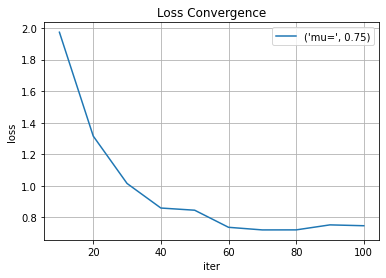

learning rate is  0.75
the batch size is  250
Iter 10. [Val Acc 56%, Loss 1.741364]
Iter 20. [Val Acc 61%, Loss 1.133404]
Iter 30. [Val Acc 65%, Loss 0.897237]
Iter 40. [Val Acc 67%, Loss 0.766673]
Iter 50. [Val Acc 69%, Loss 0.712875]
Iter 60. [Val Acc 70%, Loss 0.664743]
Iter 70. [Val Acc 71%, Loss 0.635473]
Iter 80. [Val Acc 71%, Loss 0.616606]
Iter 90. [Val Acc 72%, Loss 0.613027]
Iter 100. [Val Acc 72%, Loss 0.598755]


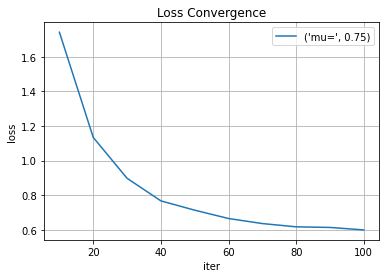

learning rate is  0.9
the batch size is  50
Iter 10. [Val Acc 55%, Loss 1.683633]
Iter 20. [Val Acc 62%, Loss 1.201921]
Iter 30. [Val Acc 65%, Loss 0.945182]
Iter 40. [Val Acc 62%, Loss 1.109729]
Iter 50. [Val Acc 65%, Loss 0.880172]
Iter 60. [Val Acc 67%, Loss 0.850123]
Iter 70. [Val Acc 66%, Loss 0.835579]
Iter 80. [Val Acc 66%, Loss 0.823286]
Iter 90. [Val Acc 71%, Loss 0.678106]
Iter 100. [Val Acc 67%, Loss 0.745992]


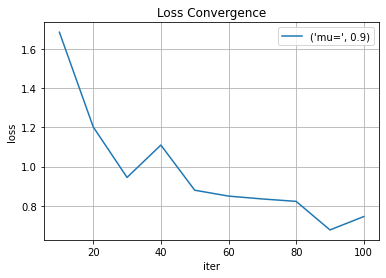

learning rate is  0.9
the batch size is  250
Iter 10. [Val Acc 57%, Loss 1.647496]
Iter 20. [Val Acc 63%, Loss 1.040985]
Iter 30. [Val Acc 67%, Loss 0.793211]
Iter 40. [Val Acc 68%, Loss 0.705478]
Iter 50. [Val Acc 70%, Loss 0.655964]
Iter 60. [Val Acc 71%, Loss 0.628976]
Iter 70. [Val Acc 71%, Loss 0.616732]
Iter 80. [Val Acc 72%, Loss 0.602433]
Iter 90. [Val Acc 72%, Loss 0.595014]
Iter 100. [Val Acc 72%, Loss 0.583104]


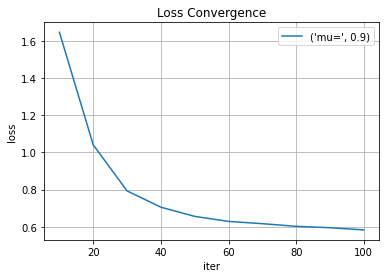

Iter 10. [Val Acc 57%, Loss 1.618331]
Iter 20. [Val Acc 62%, Loss 1.046879]
Iter 30. [Val Acc 67%, Loss 0.830201]
Iter 40. [Val Acc 68%, Loss 0.725243]
Iter 50. [Val Acc 70%, Loss 0.678728]
Iter 60. [Val Acc 70%, Loss 0.645916]
Iter 70. [Val Acc 71%, Loss 0.621274]
Iter 80. [Val Acc 72%, Loss 0.604531]
Iter 90. [Val Acc 72%, Loss 0.598115]
Iter 100. [Val Acc 71%, Loss 0.604025]
the optimal value of w is [ 1.59619116 -1.06250825 -0.32829914 -0.21753869 -0.05940441 -0.27996481
  0.24053075 -0.28430439 -0.34883135  0.32798981  0.00968824 -0.01202237
  0.27062784  0.30100149 -0.1334461   0.41101722 -0.03681054  0.63190548
 -0.11165649  0.41183351 -0.08681356 -0.14806859  0.07217969  0.00864071
 -0.37851993  0.06563209  0.2296191   0.00723319  0.00206268 -0.11786472
 -0.10632801  0.01321125  0.0037412  -0.0231357  -0.064433   -0.16230053
  0.00192909  0.13795412  0.05504954 -0.01909532 -0.03082566 -0.00528476
  0.00201474 -0.05989263 -0.03826537  0.27140039 -0.06055841 -0.19455287
  0.11684

In [17]:
w0 = np.random.randn(90)
b0 = np.random.randn(1)[0]
mu_list = [0.75,0.9]
batch_list = [50,250]
for i in range(len(mu_list)):
  for j in range(len(batch_list)):
    m = mu_list[i]
    batch = batch_list[j]
    print("learning rate is ",m)
    print("the batch size is ",batch)
    run = run_gradient_descent(w0, b0, train_norm_xs, train_ts, mu=m, batch_size=batch, max_iters=100)
    #print("the weight and bais are", run[0])
    plt.plot(run[-1],run[1])
    plt.xlabel('iter')
    plt.ylabel('loss')
    plt.title('Loss Convergence')
    plt.legend([('mu=',m)], loc ="best")
    plt.grid(True)
    plt.show()

##The optimial value of  𝐰  and  𝑏  are for 𝜇 = 0.9 and batch size = 250:
opt = run_gradient_descent(w0, b0, train_norm_xs, train_ts, mu=0.9, batch_size=250, max_iters=100)
w_opt = opt[0][0]
b_opt = opt[0][1] 
print("the optimal value of w is", w_opt)
print("the optimal value of b is", b_opt)

**Explain and discuss your results here:**
At first, we used nested loop that held more values for the learning rate and batch size. Then we narrowed down the lists becuase we came to conclusion that the lowest cost is for mu = 0.9 and the highest accaursy is for batch size=250. Therefore, we chose this values for the optimal values.
We can see that bad behavior appears when we use small batch size (for example we used batch size = 50 for learning rate equal to 0.75 and 0.9, there we can see that the loss is relatively high.)
In addition, we can see good behavior when we use large batch size, such as 250, there we get relatively low loss. 



### Part (h) -- 15%

Using the values of `w` and `b` from part (g), compute your training accuracy, validation accuracy,
and test accuracy. Are there any differences between those three values? If so, why?

In [18]:
# Write your code here
y_test = pred(w_opt,b_opt,test_norm_xs)
y_val = pred(w_opt,b_opt,val_norm_xs)
y_train  = pred(w_opt,b_opt,train_norm_xs)
train_acc = get_accuracy(y_train, train_ts)
val_acc = get_accuracy(y_val, val_ts)
test_acc = get_accuracy(y_test, test_ts)

print('train_acc = ', train_acc, ' val_acc = ', val_acc, ' test_acc = ', test_acc)


train_acc =  0.7163167881270923  val_acc =  0.71474  test_acc =  0.7116792562463684


**Explain and discuss your results here:**
We can see that all three values are around 70%. 
From this result we undrstand that the model building process was done correctly, their is no overfitting and the test accuarcy is very close to the train accuaracy which means that the model learned the data and implamented it well.

### Part (i) -- 15%

Writing a classifier like this is instructive, and helps you understand what happens when
we train a model. However, in practice, we rarely write model building and training code
from scratch. Instead, we typically use one of the well-tested libraries available in a package.

Use `sklearn.linear_model.LogisticRegression` to build a linear classifier, and make predictions about the test set. Start by reading the
[API documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

Compute the training, validation and test accuracy of this model.

In [19]:
import sklearn.linear_model

model = sklearn.linear_model.LogisticRegression()
model = model.fit(train_norm_xs,train_ts)

y_train = model.predict(train_norm_xs)
y_val = model.predict(val_norm_xs)
y_test = model.predict(test_norm_xs)
train_acc = get_accuracy(y_train, train_ts)
val_acc = get_accuracy(y_val, val_ts)
test_acc = get_accuracy(y_test, test_ts)

print('train_acc = ', train_acc, ' val_acc = ', val_acc, ' test_acc = ', test_acc)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


train_acc =  0.7330070217420205  val_acc =  0.73088  test_acc =  0.726554328878559


**This parts helps by checking if the code worked.**
**Check if you get similar results, if not repair your code**
